# Consider the above two graphs and answer the following questions

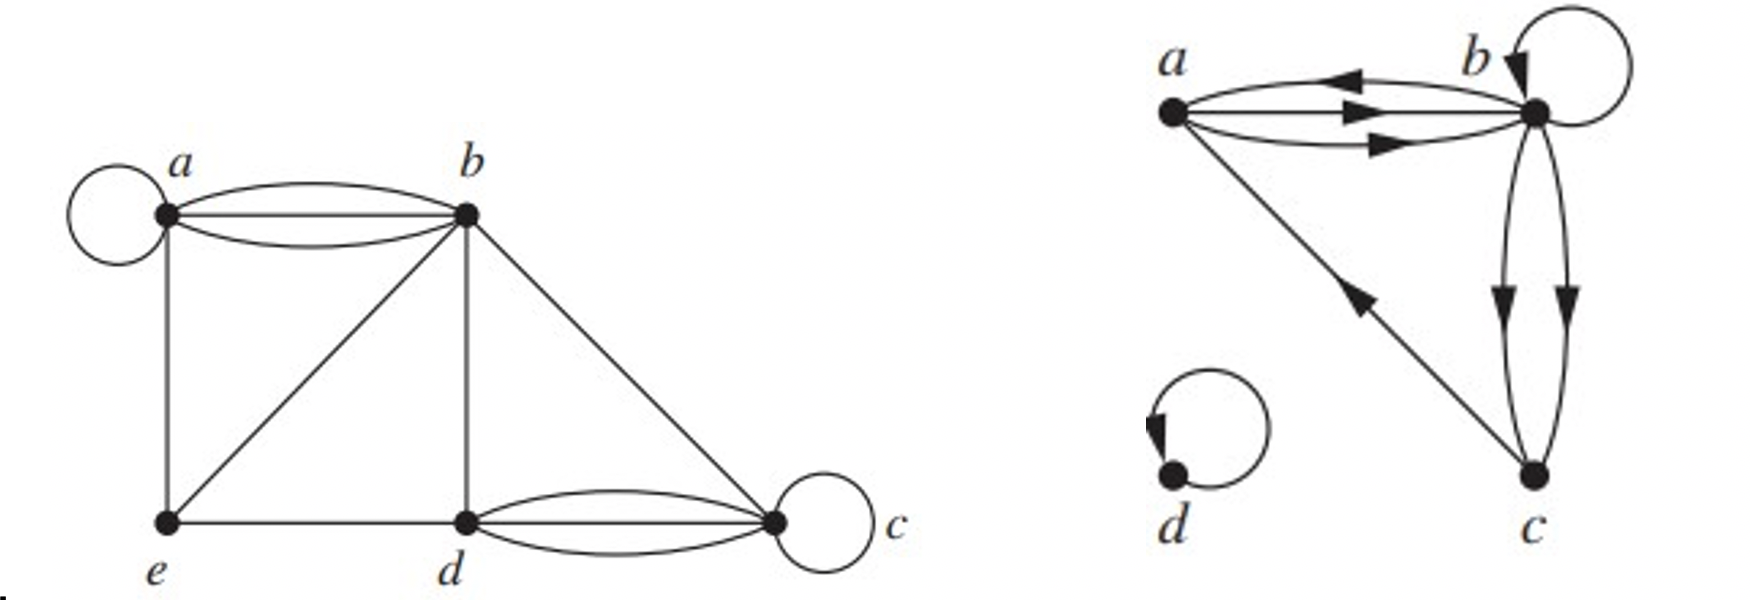

## Calculate in-degree and out-degree

In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import scipy

In [2]:
# get the raw degree of each node for the left undirected graph
G=nx.Graph()
undirected_edgelist=[('a','b',3), ('a','a',1), ('a','e',1),
          ('b','c',1), ('b','d',1), ('b','e',1),
          ('c','c',1), ('c','d',3),
          ('d','e',1)
         ]
G.add_weighted_edges_from(undirected_edgelist,weight='weight')
degree = dict(G.degree())

# print the degree of each node
for node, degree_value in degree.items():
    print("Node:", node, "Degree:", degree_value)


Node: a Degree: 4
Node: b Degree: 4
Node: e Degree: 3
Node: c Degree: 4
Node: d Degree: 3


In [3]:
# get the raw degree of each node for the right directed graph

directed_edgelist=[('a','b',2), 
          ('b','b',1), ('b','a',1), ('b','c',2),
          ('c','a',1),
          ('d','d',1)]

G1 = nx.DiGraph()
G1.add_weighted_edges_from(directed_edgelist)

in_degree = dict(G1.in_degree())
out_degree = dict(G1.out_degree())

# print the in-degree and out-degree of each node
for node in G1.nodes():
    print("Node:", node, "In-degree:", in_degree[node], "Out-degree:", out_degree[node])


Node: a In-degree: 2 Out-degree: 1
Node: b In-degree: 2 Out-degree: 3
Node: c In-degree: 1 Out-degree: 1
Node: d In-degree: 1 Out-degree: 1


## Represent them using adjacency matrix, adjacency list.

In [4]:
# get the unnormalized adjacency matrix of the "left" graph
adj_matrix = nx.to_numpy_matrix(G)

# convert the matrix to a numpy array
adj_array = np.asarray(adj_matrix)

# print the adjacency matrix
print(adj_array)


[[1. 3. 1. 0. 0.]
 [3. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 3.]
 [0. 1. 1. 3. 0.]]


In [5]:
# get the unnormalized adjacency matrix of the "right" graph
adj_matrix1 = nx.to_numpy_matrix(G1)

# convert the matrix to a numpy array
adj_array1 = np.asarray(adj_matrix1)

# print the adjacency matrix
print(adj_array1)



[[0. 2. 0. 0.]
 [1. 1. 2. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# Consider the above graph where the start node is A and the destination node is K having uniform weights. Now answer the following questions

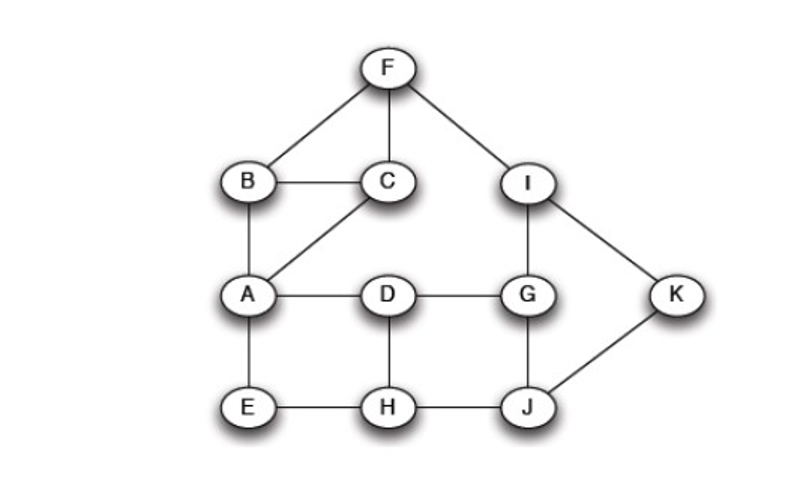

## Measure Degree Centrality

In [156]:
undirected_edgelist2=[('a','b',1), ('a','c',1), ('a','d',1),('a','e',1),
          ('b','c',1), ('b','f',1), 
          ('c','f',1), ('d','h',1),('d','g',1),
          ('e','h',1),('f','i',1),
          ('g','i',1),('g','j',1),
          ('h','j',1),
          ('i','k',1),
          ('j','k',1),           
         ]

In [157]:
G=nx.Graph()
G.add_weighted_edges_from(undirected_edgelist2)
degree = dict(G.degree())

# print the degree of each node
for node, degree_value in degree.items():
    print("Node:", node, "Degree:", degree_value)


Node: a Degree: 4
Node: b Degree: 3
Node: c Degree: 3
Node: d Degree: 3
Node: e Degree: 2
Node: f Degree: 3
Node: h Degree: 3
Node: g Degree: 3
Node: i Degree: 3
Node: j Degree: 3
Node: k Degree: 2


## Measure Closeness Centrality

In [8]:
# compute the closeness centrality values
closeness_values = nx.closeness_centrality(G)

# print the closeness centrality values for each node
for node, value in closeness_values.items():
    print("Node", node, "has closeness centrality", value)

Node a has closeness centrality 0.5
Node b has closeness centrality 0.45454545454545453
Node c has closeness centrality 0.45454545454545453
Node d has closeness centrality 0.5263157894736842
Node e has closeness centrality 0.43478260869565216
Node f has closeness centrality 0.45454545454545453
Node h has closeness centrality 0.45454545454545453
Node g has closeness centrality 0.5
Node i has closeness centrality 0.47619047619047616
Node j has closeness centrality 0.43478260869565216
Node k has closeness centrality 0.4166666666666667


## Find the shortest path using BFS algorithm

In [158]:
from collections import deque

def bfs_shortest_path(graph, start, end):
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    
    while queue:
        node = queue.popleft()
        
        if node == end:
            path = []
            while node:
                path.append(node)
                node = parent[node]
            return list(reversed(path))
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = node
                queue.append(neighbor)
    
    return None # end node is not reachable from start node


In [159]:
bfs_shortest_path(G, 'a', 'k')

#hence the shorted path from a to k is "a,b,f,i,k"

['a', 'b', 'f', 'i', 'k']

# For this task, you will work with a dataset of network graphs and perform various analyses using Python. You can use any network dataset of your choice for this resource (Link)https://snap.stanford.edu/data/, such as social networks, communication networks, or transportation networks. Your tasks are as follows:

## i) Load the network data into Python and visualize it using appropriate graph layouts and visualization techniques. Explain the structure of the network and any interesting patterns or features that you observe. (Not more than 150 words)
I use the email data from the link https://snap.stanford.edu/data/email-Eu-core.html


In [3]:



email = pd.read_csv('email-Eu-core.txt', sep=' ',names=['start','end'])
department = pd.read_csv('email-Eu-core-department-labels.txt', sep=' ',names=['email','institution'])


In [4]:
#i want to create communication network between different institutions.

email_start_institution=email.merge(department,left_on='start',right_on='email',how='left')
email_start_institution=email_start_institution.rename(columns={'institution':'start_institution'})

ins2ins=email_start_institution.merge(department,left_on='end',right_on='email',how='left')
ins2ins=ins2ins.rename(columns={'institution':'end_institution'})

In [5]:
ins2ins2=ins2ins[['start_institution','end_institution']]

In [6]:
#delete the communication within institution

# intra_ins=pd.DataFrame(columns=['start_institution','end_institution','frequency'])

intra_ins_fre={}
for i in range(len(ins2ins)):
    starti=ins2ins['start_institution'][i]
    endi=ins2ins['end_institution'][i]
    if starti==endi:
        continue
    if starti!=endi:
        institutions=str(starti)+"|"+str(endi)
        if institutions in intra_ins_fre.keys():
            intra_ins_fre[institutions]=intra_ins_fre[institutions]+1
        else:
            intra_ins_fre[institutions]=1
            

df_intra_ins_fre = pd.DataFrame.from_dict(intra_ins_fre,orient='index')

df_intra_ins_fre.reset_index(inplace=True)

df_intra_ins_fre[['from_institution','receice_institution']]=df_intra_ins_fre['index'].str.split("|",expand=True)


df_intra_ins_fre=df_intra_ins_fre.rename(columns={0:'frequency'})

institution_email=df_intra_ins_fre[['frequency','from_institution','receice_institution']]


In [31]:
institution_email

# Convert the DataFrame to a list of tuples
# weighted_edge = list(institution_email.itertuples(index=False, name=None))


weighted_edge = [(b,c,int(a)) for a,b,c in institution_email.itertuples(index=False, name=None) ]


In [35]:
# weighted_edge

In [2]:
#draw network graph baesd on the above dataframe
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [9]:
G = nx.DiGraph()
G.add_weighted_edges_from(weighted_edge)

In [33]:
# calculate the degree centrality
dc = nx.degree_centrality(G)
sorted_dc=dict(sorted(dc.items(),key=lambda x: x[1]))
# sorted_dc

In [26]:
len(list(sorted_dc.keys()))

42

In [29]:
list(sorted_dc.keys())[-6:]

['35', '14', '4', '1', '34', '36']

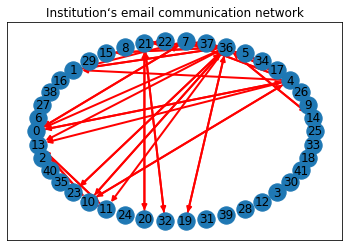

In [44]:
# pos = nx.spring_layout(G)

# create a list of edges with weight > 8
edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 60]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos)  # draw the nodes
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)  # draw the edges with weight > 60 in red
# nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)  # draw the node labels
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos)
plt.title('Institution‘s email communication network')
plt.show()

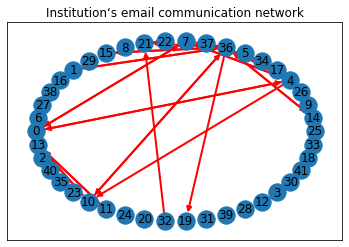

In [46]:
# pos = nx.spring_layout(G)

# create a list of edges with weight > 8
edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >80]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos)  # draw the nodes
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)  # draw the edges with weight > 80 in red
# nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)  # draw the node labels
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos)
plt.title('Institution‘s email communication network')
plt.show()

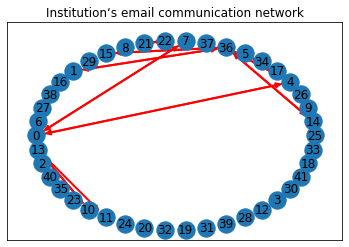

In [47]:
# pos = nx.spring_layout(G)

# create a list of edges with weight > 8
edgelist = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >100]


pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos)  # draw the nodes
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)  # draw the edges with weight > 100 in red
# nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)  # draw the node labels
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos)
plt.title('Institution‘s email communication network')
plt.show()

I increase the threshold of email frequency and draw network. We can see that institution "0"  and "4" have very frequent email communication, which are more than 100 email in both direction. While the majority of other institutions have much less communication.

                 
                 

## ii) Analyze the degree distribution of the network and determine whether it follows a power law distribution. If so, estimate the parameters of the distribution and plot the fitted line on a log-log scale. Explain the implications of a power law distribution for the network's structure and dynamics.(not more than 150 words)


In [49]:
degrees = dict(nx.degree(G))

degree_values = sorted(set(degrees.values()))
degree_distribution = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]


In [51]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

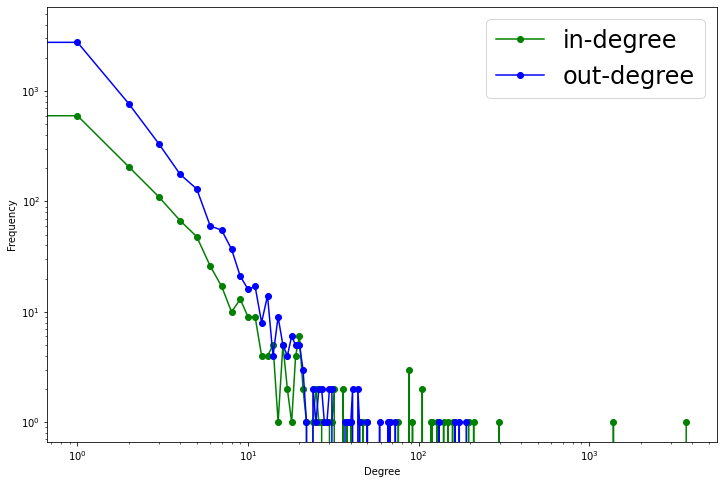

In [54]:
G = nx.scale_free_graph(5000)

in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(fontsize = 24, loc=0)


we can see the above plot match the power law. A larger in-degree or out-degree node is fewer. When the number of in- and out- degree declines, the number of nodes increase dramatically.

## iii) Compute the clustering coefficient of the network and compare it to random and regular networks with the same number of nodes and edges. Explain the significance of the clustering coefficient for the network's resilience, efficiency, and vulnerability to attacks or failures.(Not more than 200 words 

In [173]:
# Calculate the clustering coefficient of each node
cc = nx.clustering(G)
for node, coeff in cc.items():
    print(f"Clustering coefficient of node {node} is {coeff}")

Clustering coefficient of node 25 is 0.8274221453287197
Clustering coefficient of node 14 is 0.7929145361577794
Clustering coefficient of node 9 is 0.8175154320987654
Clustering coefficient of node 26 is 0.8071731585036637
Clustering coefficient of node 4 is 0.789627465303141
Clustering coefficient of node 17 is 0.8894206549118387
Clustering coefficient of node 34 is 0.7721606648199446
Clustering coefficient of node 5 is 0.9296318289786223
Clustering coefficient of node 36 is 0.7534569983136593
Clustering coefficient of node 37 is 0.7901234567901234
Clustering coefficient of node 7 is 0.8142201834862385
Clustering coefficient of node 22 is 0.846218487394958
Clustering coefficient of node 21 is 0.865120681495504
Clustering coefficient of node 8 is 0.8481745325022262
Clustering coefficient of node 15 is 0.7807576894223556
Clustering coefficient of node 29 is 0.9431643625192012
Clustering coefficient of node 1 is 0.7884264330047462
Clustering coefficient of node 16 is 0.9167533818938606
C

In [174]:
G.number_of_edges()

1203

In [175]:
G.number_of_nodes()

42

In [176]:

G_random = nx.gnm_random_graph(42, 1203)

cc_random = nx.clustering(G_random)
for node, coeff in cc_random.items():
    print(f"Clustering coefficient of random network's node {node} is {coeff}")

Clustering coefficient of random network's node 0 is 1.0
Clustering coefficient of random network's node 1 is 1.0
Clustering coefficient of random network's node 2 is 1.0
Clustering coefficient of random network's node 3 is 1.0
Clustering coefficient of random network's node 4 is 1.0
Clustering coefficient of random network's node 5 is 1.0
Clustering coefficient of random network's node 6 is 1.0
Clustering coefficient of random network's node 7 is 1.0
Clustering coefficient of random network's node 8 is 1.0
Clustering coefficient of random network's node 9 is 1.0
Clustering coefficient of random network's node 10 is 1.0
Clustering coefficient of random network's node 11 is 1.0
Clustering coefficient of random network's node 12 is 1.0
Clustering coefficient of random network's node 13 is 1.0
Clustering coefficient of random network's node 14 is 1.0
Clustering coefficient of random network's node 15 is 1.0
Clustering coefficient of random network's node 16 is 1.0
Clustering coefficient o

i can see that the clustering coefficient of the email network have different values, some are smaller than 1. In contrast, the clustering coefficient of random network is all 1. 

# Term-frequency matrix for the six documents (D1 to D6) is shown below. Answer the following questions

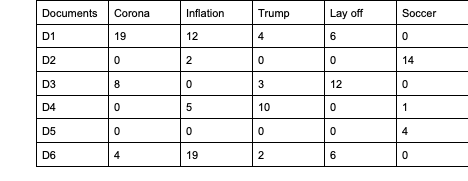

## i) What is the TF-IDF value for (D3, Lay off)

tf(lay off, D3)=log(1+12)=log13

idf (lay off,D) =log (6/3)=log2

tf-idf=log13*log2=1.78

In [27]:
np.log(13)*np.log(2)

1.7778874154035074

## ii) Find the cosine similarity between documents? Identify the two documents that are most similar.

In [28]:
d1=[19,12,4,6,0]
d2=[0,2,0,0,14]
d3=[8,0,3,12,0]
d4=[0,5,10,0,1]
d5=[0,0,0,0,4]
d6=[4,19,2,6,0]



In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



In [38]:
d=[d1,d2,d3,d4,d5,d6]
name=['d1','d2','d3','d4','d5','d6']
d2similarity={}

for i in range(len(d)-1):
    start=np.array(d[i]).reshape(1, -1)
    for j in range(i+1, len(d)):
        end=np.array(d[j]).reshape(1, -1)
        cos_sim = cosine_similarity(start, end)[0][0]
        d2similarity[name[i]+"|"+name[j]]=cos_sim
        



In [39]:
sort_d2similarity= {k: v for k, v in sorted(d2similarity.items(), key=lambda item: item[1], reverse=True)}       

sort_d2similarity      

{'d2|d5': 0.9899494936611665,
 'd1|d6': 0.7220771779832011,
 'd1|d3': 0.6788198578471486,
 'd4|d6': 0.5017005074597927,
 'd1|d4': 0.37747407526299626,
 'd3|d6': 0.365674596416343,
 'd3|d4': 0.181428752857415,
 'd2|d4': 0.15118578920369086,
 'd2|d6': 0.1315832386022443,
 'd4|d5': 0.0890870806374748,
 'd1|d2': 0.07190658212543757,
 'd1|d5': 0.0,
 'd2|d3': 0.0,
 'd3|d5': 0.0,
 'd5|d6': 0.0}

the most similar document is d2 and d5.

## iii) Often TF-IDF is used as multidimensional data in classifying document collections.Can you think of a weakness in the approach and how you may overcome it

the weakness of tf-idf: it is based on the term frequency but ignores the context of the text, and also the order of the term is not considered.

to improve it, we can use more advanced language model, such as bert, word2vector to improve the accuracy of the semantic meaning.

# In this assignment question, you will work with a dataset of text documents and perform various text-mining tasks using the nltk library in Python. You can use any text dataset of your choice, such as a collection of news articles, social media posts, or scientific papers(refer to online sources). Your tasks are as follows:


## i) Load the text data into Python and preprocess it by tokenizing the text into individual words, removing stop words, and converting all the words to lowercase

I choose the following paper: **Mogush, P., & Worthington, H. (2020). The View From Minneapolis: Comments on “Death to Single-Family Zoning” and “It’s Time to End Single-Family Zoning”. Journal of the American Planning Association, 86(1), 120-120.**


In [2]:
import nltk

from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer as wnl
import nltk, gensim, re, string, glob
from itertools import islice, compress
import itertools
import matplotlib.pyplot as plt
import numpy
import networkx as nx
import metaknowledge as mk
import re
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to /Users/yoga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yoga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# ! pip install metaknowledge

In [41]:
with open('data_question5_JAPA_paper.txt', "r") as f: 
    text=f.read()

In [42]:
text

'Journal of the American Planning Association \nISSN: 0194-4363 (Print) 1939-0130 (Online) Journal homepage: https://www.tandfonline.com/loi/rjpa20 \nThe View From Minneapolis: Comments on “Death to Single-Family Zoning” and “It’s Time to End Single-Family Zoning” \nPaul Mogush & Heather Worthington \nTo cite this article: Paul Mogush & Heather Worthington (2020) The View From Minneapolis: Comments on “Death to Single-Family Zoning” and “It’s Time to End Single-Family Zoning”, Journal of the American Planning Association, 86:1, 120-120, DOI: 10.1080/01944363.2019.1689012 To link to this article:  https://doi.org/10.1080/01944363.2019.1689012 \nPublished online: 27 Jan 2020. \nSubmit your article to this journal \nArticle views: 71 \nView related articles \nView Crossmark data \nFull Terms & Conditions of access and use can be found at https://www.tandfonline.com/action/journalInformation?journalCode=rjpa20 \n\nJournal of the American Planning Association \n120 \n2020 | Volume 86 Number

In [5]:
translator = str.maketrans('', '', string.punctuation.replace('-', '')) #filters punctuation except dash
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizeCondition = 1
lemmatizer = wnl()

sents = sent_tokenize(text)  # Split into sentences
sents = [word_tokenize(s) for s in sents]
sents = [[w.translate(translator) for w in s] for s in sents]  # filter punctuation
sents = [[re.sub(r'\d+', '', w) for w in s] for s in #delete numeric later on
          sents]  # replace all numerals with the holder "number"
sents = [[w for w in s if re.search('[^a-zA-Z-]+', w) is None] for s in
          sents]  # trips everything but alphabetic
sents = [[w.lower() for w in s] for s in sents]  # make lower case
sents = [s for s in sents if len(s) > 0]  # remove empty lines
sents = [[w for w in s if not w in stop_words] for s in sents]  # filter stop words
sents = [[w for w in s if len(w) > 1] for s in sents]  # filters out variables, etc
sents = [[w for w in s if len(w) > 2] for s in sents]  # filters out variables, etc
sents = [[w for w in s if len(w) > 3] for s in sents]  # filters out variables and abbreviations
sents = [s for s in sents if len(s) > 0]  # remove empty lines

sents2 = list(itertools.chain.from_iterable(sents))  # join list of lists

    # Write cleaned text to file
# with open(output_path+"_clean_"+name, 'a') as f:
#     for wordsList in words:
#         f.write(" ".join(wordsList) + "\n")

[nltk_data] Downloading package stopwords to /Users/yoga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
sents2

['journal',
 'american',
 'planning',
 'association',
 'issn',
 'print',
 'online',
 'journal',
 'homepage',
 'https',
 'wwwtandfonlinecomloirjpa',
 'view',
 'minneapolis',
 'comments',
 'death',
 'single-family',
 'zoning',
 'time',
 'single-family',
 'zoning',
 'paul',
 'mogush',
 'heather',
 'worthington',
 'cite',
 'article',
 'paul',
 'mogush',
 'heather',
 'worthington',
 'view',
 'minneapolis',
 'comments',
 'death',
 'single-family',
 'zoning',
 'time',
 'single-family',
 'zoning',
 'journal',
 'american',
 'planning',
 'association',
 'link',
 'article',
 'https',
 'doiorg',
 'published',
 'online',
 'submit',
 'article',
 'journal',
 'article',
 'views',
 'view',
 'related',
 'articles',
 'view',
 'crossmark',
 'data',
 'full',
 'terms',
 'conditions',
 'access',
 'found',
 'https',
 'wwwtandfonlinecomactionjournalinformation',
 'journalcoderjpa',
 'journal',
 'american',
 'planning',
 'association',
 'volume',
 'number',
 'commentaries',
 'view',
 'minneapolis',
 'comments',

## ii) Implement stemming and lemmatization techniques to further process the text data. Compare and contrast the differences between the two approaches and explain which approach you would choose in different situations. (explanation not more than 250 words )

In [14]:
#implement lemmatization

words_lemmatize = [[lemmatizer.lemmatize(w) for w in s if lemmatizeCondition == 1] for s in sents]  # lemmatize
words_lemmatize = list(itertools.chain.from_iterable(words_lemmatize))  # join list of lists

In [15]:
words_lemmatize[100:105]

['community', 'using', 'work', 'minneapolis', 'state']

In [9]:
#implement stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# stem = stemmer.stem(word)


In [10]:
words_stem = [[stemmer.stem(w) for w in s if lemmatizeCondition == 1] for s in sents]  # stem
words_stem = list(itertools.chain.from_iterable(words_stem))  # join list of lists

In [11]:
words_stem[100:105]

['commun', 'use', 'work', 'minneapoli', 'state']

from the above case, we can see the following difference: 
1.lemmatize: convert a word to its base form. for example, change from communities to community.
2.stem: Stemming usually refers to normalizing words into its base form or root form. for example, change community to commun, change using to use.

the differentce is: lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

in the practice, I would prefer lemmatize to stem because it gives me more meaningful words.


## iii) Use the nltk library to calculate various statistics on the text data, such as the frequency distribution of words, the most common words, and the average word length. Visualize the results using appropriate charts and graphs.



### the frequency distribution of words


In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


In [19]:
# Calculate the frequency distribution of words
freq_dist = FreqDist(words_lemmatize)



In [21]:
freq_dist

FreqDist({'minneapolis': 13, 'planning': 9, 'zoning': 9, 'single-family': 8, 'city': 7, 'housing': 7, 'view': 6, 'journal': 5, 'http': 5, 'article': 5, ...})

### draw a figure

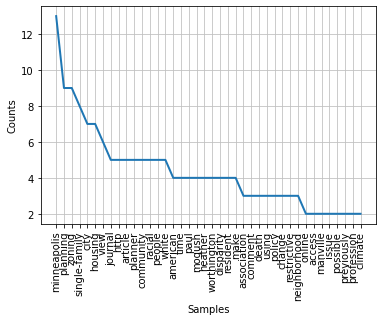

In [24]:
import matplotlib.pyplot as plt
freq_dist.plot(40, cumulative=False)
plt.show()

### most common words

In [17]:
# Print the top 10 most common words and their frequencies
print(freq_dist.most_common(10))

[('minneapolis', 13), ('planning', 9), ('zoning', 9), ('single-family', 8), ('city', 7), ('housing', 7), ('view', 6), ('journal', 5), ('http', 5), ('article', 5)]


### average word length

In [29]:
# Calculate the total length of all words
total_length = sum(len(word) for word in sents2)

# Calculate the average word length
avg_length = total_length / len(sents2)

# Print the average word length
print("Average word length:", avg_length)

Average word length: 7.754347826086956


## iv) Apply topic modeling techniques to the text data, such as Latent Dirichlet Allocation (LDA), to identify the underlying themes or topics in the dataset. Explain how you would interpret the results and what insights you can gain from them.(Bonus Question)

In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Input text data
with open('data_question5_JAPA_paper.txt', "r") as f: 
    text=f.read()
text=[text]

# Tokenize the text into words
tokens = [word_tokenize(doc.lower()) for doc in text]

# Remove stopwords and lemmatize the tokens
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokens = [[lemmatizer.lemmatize(token) for token in doc if token not in stop_words] for doc in tokens]

# Create a dictionary and corpus of the tokens
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Apply LDA to the corpus
num_topics = 2
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics and their top words
for topic in lda_model.print_topics():
    print(topic)


(0, '0.050*"," + 0.036*"." + 0.021*":" + 0.016*"minneapolis" + 0.015*"(" + 0.015*")" + 0.012*"zoning" + 0.011*"planning" + 0.009*"”" + 0.009*"single-family"')
(1, '0.028*"," + 0.018*"." + 0.015*":" + 0.012*"minneapolis" + 0.011*")" + 0.011*"“" + 0.010*"single-family" + 0.010*"”" + 0.010*"(" + 0.009*"planning"')


from the above results, i can see that the text only include one topic, because the two output topic are very similar. the topic focuses on  single-family zoning in Minneapolis, which is a hot topic in urban planning field.

##  Discuss the limitations and potential biases of your approach, and suggest possible improvements or future directions(not more than 300 words )

the potential bias of the LDA methods include: 
    
1.we need to pre-determine the number of optimal topic, which is subjective.
    
2.it is hard to interpret. the LDA is a probabilistic model and intepreting the results needs specific domain knowledge.

possible improvements:
    
1. we can try different numbers of topics, tune the parameter and compare the results.

2. we can integrate domain knowledge to interpret the model results.
    

# Using the friendship network in this class to study the following questions

https://docs.google.com/spreadsheets/d/16zRiKesRjmdvtKp7xoqCjPQW97WpS8zroGvsnIyOtRQ/edit?usp=sharing![image.png](attachment:image.png)

## i)	Which students have the maximum in-degree and out-degree?

In [2]:
friendship=pd.read_csv('Friendship - Sheet1.csv')

# change the 'Unnamed: 0'' column to an index
friendship.set_index('Unnamed: 0', inplace=True)


In [3]:
friendship_row=friendship.index.tolist()
friendship_col=friendship.columns.tolist()
friendship_col_remain=[]
for row in friendship_row:
    if row in friendship_col:
        friendship_col_remain.append(row)
        



In [4]:
friendship=friendship[friendship_col_remain]

In [5]:
friendship

# select rows by index using a list
friendship2 = friendship.loc[friendship_col_remain]

In [6]:
len(friendship2.index.tolist())

87

In [7]:
len(friendship_col_remain)

85

In [8]:
len(friendship2)

friendship2.iloc[0,0]

friendship2.fillna(0, inplace=True)
friendship2

,Hyunjin Yi,Mike Zahorec,Cole McGuire,Marcelo Paesani,Brady Henderson,Jacquelyn Nogueras,Caitlyn Jessee,Zhixi Lin,Sabrina Callejo,AkhilRaj Tirumalasetty,...,Anusha Dayanand,Aditya Madhusudhan,Tejas Vedagiri,Nikhila Vudem,Keerthi Reddy Vudem,Andrew Franklin,Austin Miller,AIdan Mahoney,Frecks Bertrand,Abhishek Pavshe
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Hyunjin Yi,1.0,1,0,0,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Mike Zahorec,1.0,1,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Cole McGuire,0.0,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
Marcelo Paesani,0.0,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Brady Henderson,0.0,0,0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andrew Franklin,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austin Miller,0.0,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
AIdan Mahoney,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [9]:
#create weighted edges
tielist=[]
for i in range(len(friendship2)):
    for j in range(len(friendship_col_remain)):
        tie=friendship2.iloc[i,j]
        if tie !=0:
            if friendship2.index[i] !=friendship2.columns[j]: #not himself or herself
                singletie=(friendship2.index[i],friendship2.columns[j],1)
                tielist.append(singletie)
                
            
            



In [10]:
tielist

[('Hyunjin Yi', 'Mike Zahorec', 1),
 ('Hyunjin Yi', 'Cole McGuire', 1),
 ('Hyunjin Yi', 'Marcelo Paesani', 1),
 ('Hyunjin Yi', 'Brady Henderson', 1),
 ('Hyunjin Yi', 'Jacquelyn Nogueras', 1),
 ('Hyunjin Yi', 'Zhixi Lin', 1),
 ('Hyunjin Yi', 'Calvin Smyk', 1),
 ('Hyunjin Yi', 'Preston Turnage', 1),
 ('Hyunjin Yi', 'Abhishek Pavshe', 1),
 ('Mike Zahorec', 'Hyunjin Yi', 1),
 ('Mike Zahorec', 'Cole McGuire', 1),
 ('Mike Zahorec', 'Marcelo Paesani', 1),
 ('Mike Zahorec', 'Brady Henderson', 1),
 ('Mike Zahorec', 'Jacquelyn Nogueras', 1),
 ('Mike Zahorec', 'Calvin Smyk', 1),
 ('Mike Zahorec', 'Preston Turnage', 1),
 ('Mike Zahorec', 'Ross Kane', 1),
 ('Mike Zahorec', 'Abhishek Pavshe', 1),
 ('Cole McGuire', 'Mike Zahorec', 1),
 ('Cole McGuire', 'Marcelo Paesani', 1),
 ('Cole McGuire', 'Brady Henderson', 1),
 ('Cole McGuire', 'Jacquelyn Nogueras', 1),
 ('Cole McGuire', 'Davone Simmons', 1),
 ('Cole McGuire', 'Chris Pierre Paul', 1),
 ('Cole McGuire', 'Kirsten Blair', 1),
 ('Cole McGuire', 'Aus

In [11]:
G=nx.Graph()
G.add_weighted_edges_from(tielist)

## ii)	Measure Degree Centrality

In [111]:
dc=nx.degree_centrality(G)

In [112]:
dc

{'Hyunjin Yi': 0.11842105263157894,
 'Mike Zahorec': 0.881578947368421,
 'Cole McGuire': 0.881578947368421,
 'Marcelo Paesani': 0.894736842105263,
 'Brady Henderson': 0.8684210526315789,
 'Jacquelyn Nogueras': 0.8684210526315789,
 'Zhixi Lin': 0.13157894736842105,
 'Calvin Smyk': 0.11842105263157894,
 'Preston Turnage': 0.10526315789473684,
 'Abhishek Pavshe': 0.8552631578947368,
 'Ross Kane': 0.09210526315789473,
 'Davone Simmons': 0.10526315789473684,
 'Chris Pierre Paul': 0.09210526315789473,
 'Kirsten Blair': 0.10526315789473684,
 'Austin Miller': 0.10526315789473684,
 'Jason St. John': 0.11842105263157894,
 'Ryan Fontaine': 0.10526315789473684,
 'Fazlidddin Mirsoatov': 0.11842105263157894,
 'Ibrahim Afridi': 0.10526315789473684,
 'Hannah Housand': 0.13157894736842105,
 'Margaret Rivas': 0.11842105263157894,
 'Marija Travoric': 0.10526315789473684,
 'Caitlyn Jessee': 0.10526315789473684,
 'Logan Poland': 0.10526315789473684,
 'Lucas Zavalia': 0.10526315789473684,
 'Linwei Jiang': 0

## iii)	Measure Closeness Centrality

In [113]:
cc=nx.closeness_centrality(G)

In [114]:
cc

{'Hyunjin Yi': 0.5100671140939598,
 'Mike Zahorec': 0.8941176470588236,
 'Cole McGuire': 0.8941176470588236,
 'Marcelo Paesani': 0.9047619047619048,
 'Brady Henderson': 0.8837209302325582,
 'Jacquelyn Nogueras': 0.8837209302325582,
 'Zhixi Lin': 0.5135135135135135,
 'Calvin Smyk': 0.5100671140939598,
 'Preston Turnage': 0.5066666666666667,
 'Abhishek Pavshe': 0.8735632183908046,
 'Ross Kane': 0.5066666666666667,
 'Davone Simmons': 0.5066666666666667,
 'Chris Pierre Paul': 0.5033112582781457,
 'Kirsten Blair': 0.5066666666666667,
 'Austin Miller': 0.5066666666666667,
 'Jason St. John': 0.5100671140939598,
 'Ryan Fontaine': 0.5066666666666667,
 'Fazlidddin Mirsoatov': 0.5135135135135135,
 'Ibrahim Afridi': 0.5135135135135135,
 'Hannah Housand': 0.5205479452054794,
 'Margaret Rivas': 0.5135135135135135,
 'Marija Travoric': 0.5066666666666667,
 'Caitlyn Jessee': 0.5066666666666667,
 'Logan Poland': 0.5066666666666667,
 'Lucas Zavalia': 0.5066666666666667,
 'Linwei Jiang': 0.506666666666666

# The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey. The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data. If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.


## Write a python script that will generate the data frame as below:

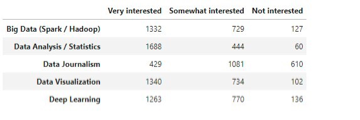

In [148]:
topic=pd.read_csv('Topic_Survey_Assignment.csv',index_col=0)


In [149]:
topic

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


##   Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage 	of the respondents' interest in the different data science topics surveyed.


In [150]:
topic=topic.sort_values(by='Very interested',ascending=False)

In [151]:
topic.sum()

Very interested        7681
Somewhat interested    4235
Not interested         1109
dtype: int64

In [152]:
topic

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [153]:
#change into the percentage
for i in range(len(topic)):
    for j in range(len(topic.columns)):
        topic.iloc[i,j]=(topic.iloc[i,j]/2233).round(2)
        



In [154]:
topic

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


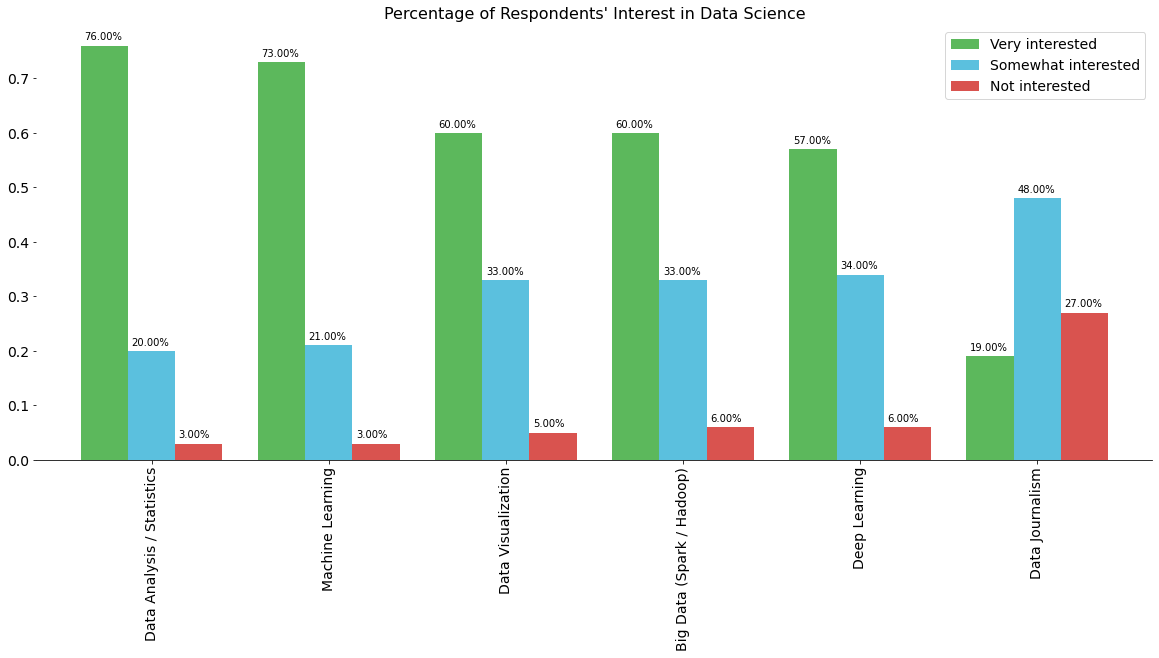

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

#PLOTTING
ax1 = topic.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#5cb85c', '#5bc0de', '#d9534f'),
                fontsize = 14)
ax1.set_title("Percentage of Respondents' Interest in Data Science", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Adding the percentage values    
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))